# Tutrial 5: Fitting 1D/2D Cross-Correlation Statistc

## Parameters fit within error to probablity function for complete spatial randomness

### Introduction

Complete spatial Randomness descripes a spatial point process where points measured are distributed by a random mechanism or process. This is the basis for measuring whether or not a seen distribution or density of points in a given spatial range was a direct result of a homogenous spatial poisson process. This test allows statasticians to determine whether a the average distance between two particles in a distribution is significantly short or long. 

In this tutorial we will fit with python package pyplot in matplotlib the following PCF statistics derived in tutorial 4 with the probability function for Complete Spatial Randomness which is given by the following equation(s).

### 1D version

$$\begin{align} P_{r} = \frac{1}{\beta!}*\lambda^N*r^\beta*e^{-\lambda*r} \end{align}$$

### 2D Version

$$\begin{align} P_{(x,y)} = \frac{1}{\beta!}*\lambda^N*(\sqrt{x^2+y^2})^\beta*e^{-\lambda*\sqrt{x^2+y^2}} \end{align}$$

### The fitpcf() function can be called from the pygempick.modeling package which is defined below:

```python

def fitpcf(data, N, p0, p1):
    
    data = pd.DataFrame(data)
    data = data.fillna(0)

    #determine guess filtering parameters
    pcfp1 = np.array([N,p0,p1])
    x = data[2].values
    y = data[0].values
    dy = data[1].values
    
    popt1, pcov1 = opt.curve_fit(spa.pcf , x, y,  p0 = pcfp1)
    popt1 = np.around(popt1, decimals=2)
    
    plt.figure()
    plt.title('Probability of Gold Particle Colocolization on TTR micrographs' )
    #CSR of CD1 Micgrgrap set 
    plt.plot(x,y,'xr') #keypoints of CD1 micrographs
    plt.plot(np.arange(0,210,1), spa.pcf(np.arange(0,210,1), popt1[0], popt1[1], popt1[2]),
                       'g-', label='V30M CSR, N = {} +/- {}, L = {} +/- {}'.format(popt1[0],
                                                 np.around(np.sqrt(pcov1[0,0]), decimals=3),
                                                 popt1[1], np.around(np.sqrt(pcov1[1,1]), decimals=3))) 
    plt.errorbar(x, y, yerr=dy, fmt='og')
    plt.legend(loc='best')
    plt.grid(True)
    plt.xlabel('Radius (r)')
    #Probability Nth point at distance r 
    plt.ylabel('P(r)')
    
    plt.show()
    
    return popt1, np.around(np.sqrt(pcov1), decimals=3)


```


In [1]:
import pylab as plt
import pygempick.modeling as mod
import pygempick.spatialstats as spa
import numpy as np
import pandas as pd


In [2]:
data1 = pd.read_csv('/home/joseph/Documents/pygempick/supdocs/pcf-dr5-error3.csv',\
                    header=None, skiprows=1)

Here is the fitted 1D pair-wise probability distribution of immunogold particles on ATTR micrographs.


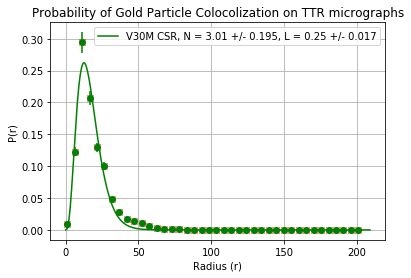

Here is the 2D representation of the fitted funtion...


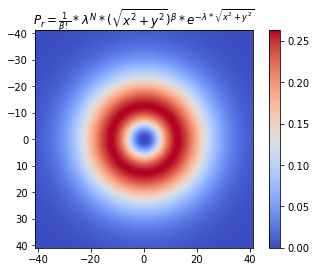

In [5]:
print('Here is the fitted 1D pair-wise probability distribution of immunogold particles on ATTR micrographs.')
popt, pcov = mod.fitpcf(data1, 10., 1., 1.)

print('Here is the 2D representation of the fitted funtion...')
plt.figure()
x = np.arange(-41,41,.25)
y = np.arange(-41,41,.25)

X,Y = plt.meshgrid(x, y) # grid of point

Z = spa.pcf2d(X,Y, popt[0], popt[1], popt[2])

im = plt.imshow(Z,cmap=plt.cm.coolwarm, extent=(-41, 41, 41, -41)) # drawing the function

#plt.clabel(cset, inline=True, fmt='%1.1f', fontsize=10)
plt.colorbar(im) # adding the colobar on the right
plt.title(r'$P_r= \frac{1}{\beta!}*\lambda^{N}*(\sqrt{x^2 + y^2})^\beta*e^{-\lambda*\sqrt{x^2 + y^2}}$')

plt.show()